# Определение закономерностей определяющих успешность компьютерной игры

**Данные** - <em>исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).</em><br>
**Цель** - <em>выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.</em><br>

**Описание данных**

-	<em>Name</em> — название игры.
-	<em>Platform</em> — платформа.
-	<em>Year_of_Release</em> — год выпуска.
-	<em>Genre</em> — жанр игры.
-	<em>NA_sales</em> — продажи в Северной Америке (миллионы долларов).
-	<em>EU_sales</em> — продажи в Европе (миллионы долларов).
-	<em>JP_sales</em> — продажи в Японии (миллионы долларов).
-	<em>Other_sales</em> — продажи в других странах (миллионы долларов).
-	<em>Critic_Score</em> — оценка критиков (максимум 100).
-	<em>User_Score</em> — оценка пользователей (максимум 10).
-	<em>Rating</em> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Оглавление
1. [Загрузка данных и изучение общей информации по проекту](#download-data)
2. [Предобработка данных](#data-preprocessing)
    - [Проверка и обработка текстовых данных](#data-str-check)
    - [Обработка пустых значений](#processing-empty-values)
    - [Проверка и обработка типов данных](#data-type-change)
    - [Проверка и обработка дубликатов](#duplicate-check)
3. [Расчет данных](#data-counting)
4. [Анализ данных](#data-analysis)
    - [Определение актуального периода для анализа](#determine-the-relevant-period)
    - [Определение лучших игровых платформ](#identify-the-best-game-platforms)
    - [Определение самых популярных жанров компьютерных игр](#define-the-most-popular-genres)
    - [Определение топ-5 популярных платформ в отдельном регионе](#define-top5-platform-sales)
    - [Определение топ-5 популярных жанров в отдельном регионе](#define-top5-genre-sales)
    - [Определение влияния рейтинга ESRB на продажи в отдельном регионе](#define-ESRB-rating-affects-sales)
5. [Проверка гипотез](#hypothesis-testing)
    - [Проверка гипотезы о различии пользовательских рейтингов платформ Xbox One и PC одинаковые](#revenue-difference-Xbox-PC) 
    - [Проверка гипотезы о различии средних пользовательских рейтингов жанров Action и Sports](#revenue-difference-genre_Action-n-Sport)
6. [Выводы](#conclusions)

## <a id='download-data'><span style="color:black">1. Загрузка данных и изучение общей информации по проекту</span></a>

In [1]:
from matplotlib.ticker import FuncFormatter
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# код для отображения 30 столбцов
pd.options.display.max_columns = 40
from scipy import stats as st
from skimpy import clean_columns

In [2]:
data = pd.read_csv('datasets/games.csv')
display(data.head(15))
display(data.describe())
display(data.info(memory_usage='deep'))
print(f'Количество строк и столбцов в датафрейме: {data.shape}')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 5.6 MB


None

Количество строк и столбцов в датафрейме: (16715, 11)


Для исследования предоставлени датафрейм, состоящий из 11 столбцов и 16715 строк. 5 столбцов имеют тип данных object, 6 - float. Изучение общей информации по датафрейму, описательной статистики позволяет выявить следующие недостатки: 
   - в столбце Year_of_Release необходимо изменить тип переменных на int;
   - имеются пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating;
   - столбцы Critic_Score, User_Score содержат числовые переменные, но имееют разный тип. Необходимо изучить причины и привести схожие характеристики к одному типу.

**Вывод**: До перехода к анализу данных необходимо обработать и (или) устранить выявленные недостатки таблицы: изменить типы данных в необходимых случаях (в том числе в целях оптимизации датафрейма), заполнить пропуски, проверть наличие дубликатов.

## <a id='data-preprocessing'><span style="color:black">2. Предобработка данных</span></a>

### <a id='data-str-check'><span style="color:black">Проверка и обработка текстовых данных</span></a>

Проверяем корректность названий столбцов.

In [3]:
display(data.columns.values.tolist())

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

Названия столбцов корректны, лишних пробелов не имеют. Изменим регистр названия на нижнис с помощью метода clean_columns() библитеки skimpy.

In [4]:
data = clean_columns(data)
display(data.columns.tolist())

11 column names have been cleaned

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

Для того чтобы избежать возможных дубликатов данных за счет написания текстовых данных символами разного регистра проверим данные в столбцах Genre и Platform.

In [5]:
display(data.genre.value_counts())
display(data.platform.value_counts())

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Данные корректны, повторов с разным регистром нет, поэтому изменять регистр не будем.

### <a id='processing-empty-values'><span style="color:black">Обработка пустых значений</span></a>

Предварительный анализ данных показал наличие пропущенных значений в базе данных. Подсчитаем количество пропусков по каждому столбцу.

In [6]:
display(data.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Обращает на себя внимание наличие пропущенных значений в столбце Name. Рассмотрим более подробно строки, содержащие такие значения.

In [7]:
display(data[data['name'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В датафрейме имеются две строки, в которой кроме названия игр отстутсвует также информация о жанре, оценках критиков и пользователей, а также о рейтенге игры. При этом год выпуска таких игр указан - 1993. Скорее всего такие пропуски возникли при выгрузке данных.
Так как, восставить название игр по имеющимся данных не представляется возможным, а также в связи с небольшим объемом таких пропущенных значений наиболее целесообразным в таком случае будет удаление таких строк. Осуществим удаление и сделаем проверку по результатам.

In [8]:
def skip_check(col):
    if data[col].isnull().sum() == 0:
        print(f'Пропущенные значения в столбце {col} отсутствуют')
    else:
        print(f'Колиство пропущенных значений в столбце {col} = {data[col].isnull().sum()}')


data.dropna(subset=['name'], inplace=True)
skip_check('name')

Пропущенные значения в столбце name отсутствуют


Столбце Year_of_Release содержит 269 пустых значений. Изучим датафрейм на предмет наличия данных которые бы позволили восстановить пропущенные значения.

In [9]:
display(data[(data['year_of_release'].isnull())].head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Некоторые игры в своих названия содержат числовое значение, указывающее на год, которому посвящена игра (например, игра FIFA Soccer 2004 посвящена футбольному сезону 2004 года, но сама игра скорее всего выпущенав 2003 году), другие - такую информацию не содержат. В таком случае наиболее целесообразным будет применить медианное значения для заполнения пропущенных значений по столбцу Year_of_Release, но так как игры для разных платформ выпускались в разное время, то и медианное значения нужно выбирать в зависимости от платформы. Проверим так ли это на самом деле.

In [10]:
display(data.groupby(['platform'], as_index=False).agg({'year_of_release': 'median'}))

,platform,year_of_release
0,2600,1982.0
1,3DO,1995.0
2,3DS,2013.0
3,DC,2000.0
4,DS,2008.0
5,GB,1997.0
6,GBA,2003.0
7,GC,2003.0
8,GEN,1993.0
9,GG,1992.0


Предположение подтвердилось: каждая платформа имеет свое медианное значение года выпуска игр. Произведем замену пропущенных значений в столбце Year_of_Release медианным значением в соответствии с платформой, для которой разрабатывалась игра.

In [11]:
platforms = data['platform'].unique()

for platform in platforms:
    platform_median = data[data['platform'] == platform]['year_of_release'].median()
    data.loc[(data['platform'] == platform) & (data['year_of_release'].isnull()), 'year_of_release'] = platform_median

skip_check('year_of_release')

Пропущенные значения в столбце year_of_release отсутствуют


Далее приступаем к заполнению пропусков по столбцам Critic_Score и User_Score. Для начала проверим столбец User_Score, который содержит переменные с типом object.

In [12]:
display(data['user_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как можно заметить столбец User_Score содержит не только числовые значения и пропуски, но и строковые переменные 'tbd'. Данная аббревиатура образована от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. То есть, на момент сбора базы данных пользовательская оценка игры проста не была дана. По большому с точки зрения анализа это тот же пропуск в данных, но который имеет объективный характер (то есть произошел не по причине ошибок при сборе или выгрузке данных). Будем заменять такие значения на NaN, а затем обрабатывать как и остальные пропуски. При этом сразу изменим тип данных на float.

In [13]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')
display(data.info())
display(data['user_score'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


None

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Теперь обрабатываем непосредственно пропуски в столбцах Critic_Score и Users_Score. Исходим из предположения, что оценка игр может отличаться не только в зависимости от платформы, но также и от жанра (при этом одна и таже игра на разных платформах может иметь разный рейтинг).

In [14]:
platform_genre_group = data.groupby(['platform', 'genre'], as_index=False)\
    .agg({'critic_score': 'median', 'user_score': 'median', 'year_of_release': 'max'})
display(platform_genre_group[(platform_genre_group['critic_score'].notnull()) | (platform_genre_group['user_score'].notnull())].head(20))

,platform,genre,critic_score,user_score,year_of_release
13,3DS,Action,63.0,6.65,2016.0
14,3DS,Adventure,63.5,7.00,2016.0
15,3DS,Fighting,64.0,6.60,2016.0
16,3DS,Misc,71.5,7.30,2016.0
17,3DS,Platform,71.0,7.15,2016.0
18,3DS,Puzzle,69.0,7.15,2015.0
19,3DS,Racing,59.0,6.80,2013.0
20,3DS,Role-Playing,74.0,7.80,2016.0
21,3DS,Shooter,75.0,7.00,2013.0
22,3DS,Simulation,71.0,7.40,2016.0


Как видим предположение верное, поэтому произведем замену пропусков медианным значением в соответствии с платформой и жанром игры.

In [15]:
genres = data['genre'].unique()

for platform in platforms:
    for genre in genres:
        platform_genre_critic_score = data[(data['platform'] == platform) 
                                           & (data['genre'] == genre)]['critic_score'].median()
        platform_genre_user_score = data[(data['platform'] == platform) 
                                         & (data['genre'] == genre)]['user_score'].median()
        data.loc[(data['platform'] == platform) & (data['genre'] == genre) 
                 & (data['critic_score'].isnull()), 'critic_score'] = platform_genre_critic_score
        data.loc[(data['platform'] == platform) & (data['genre'] == genre) 
                 & (data['user_score'].isnull()), 'user_score'] = platform_genre_user_score

display(data.isnull().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1132
user_score         1125
rating             6764
dtype: int64

Как видим предложенной стратегигей не удалось заменить все пропущенные значения в столбцах Critic_Score и User_Score. Возможно по отдельным платформам вообще отсутствуют значения в указанных столбцах, в связи с чем невозможно рассчитать медианное значение.

In [16]:
display(platform_genre_group[(platform_genre_group['critic_score'].isnull()) | 
                             (platform_genre_group['user_score'].isnull())].sort_values('year_of_release', 
                                                                                        ascending=False).head(20))

,platform,genre,critic_score,user_score,year_of_release
198,PSV,Simulation,NaN,NaN,2016.0
200,PSV,Strategy,NaN,2.0,2016.0
102,N64,Sports,NaN,NaN,2002.0
99,N64,Role-Playing,NaN,NaN,2001.0
56,GB,Strategy,NaN,NaN,2001.0
49,GB,Platform,NaN,NaN,2001.0
47,GB,Adventure,NaN,NaN,2001.0
46,GB,Action,NaN,NaN,2001.0
25,DC,Action,NaN,NaN,2001.0
233,WS,Strategy,NaN,NaN,2001.0


Ранее в сводную таблицу был добавлен крайний срок, в пределах которого выпускались игры по отдельным платформам. Можно сделать вывод, что действительно по платформам, игры для которых выпускались до 2002 года, отсутствуют оценки критиков и пользователей. Так как, для анализа стратегии на 2017 год информация об платформах,  игры для которых выпускались до 2002 года, скорее всего не имеет существенного значения, то таки данные заменять не будем, оставим пустые значения. Рассмотрим информацию об играх на платформе PSV.

In [17]:
display(data[(data['platform'] == 'PSV') & (data['genre'] == 'Strategy')])
display(data[(data['platform'] == 'PSV') & (data['genre'] == 'Simulation')])
display(data[(data['platform'] == 'PSV')].median())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11255,SD Gundam G Generation Genesis,PSV,2016.0,Strategy,0.00,0.00,0.09,0.00,NaN,2.0,NaN
11339,Angry Birds Star Wars,PSV,2013.0,Strategy,0.03,0.03,0.00,0.02,NaN,2.0,E
12286,Genkai Tokki Monster Monpiece,PSV,2013.0,Strategy,0.00,0.00,0.06,0.00,NaN,2.0,NaN
12956,Nobunaga's Ambition: Sphere of Influence,PSV,2014.0,Strategy,0.00,0.00,0.05,0.00,NaN,2.0,NaN
14340,Super Robot Taisen OG Saga: Masou Kishin III -...,PSV,2013.0,Strategy,0.00,0.00,0.03,0.00,NaN,2.0,NaN
15461,Nobunaga's Ambition: Tenshouki with Power-Up K...,PSV,2015.0,Strategy,0.00,0.00,0.02,0.00,NaN,2.0,NaN
16016,Sid Meier's Civilization Revolution 2+,PSV,2015.0,Strategy,0.00,0.00,0.02,0.00,NaN,2.0,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14756,Dream Club Zero Portable,PSV,2011.0,Simulation,0.00,0.0,0.03,0.0,NaN,NaN,NaN
14809,Himoutou! Umaru-Chan: Himoutou Ikusei Keikaku,PSV,2015.0,Simulation,0.00,0.0,0.03,0.0,NaN,NaN,NaN
16553,Farming Simulator 2014,PSV,2014.0,Simulation,0.01,0.0,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.0,0.01,0.0,NaN,NaN,NaN


year_of_release    2014.00
na_sales              0.00
eu_sales              0.00
jp_sales              0.03
other_sales           0.00
critic_score         71.50
user_score            7.60
dtype: float64

Можно заметить, что игры в жанре Strategy платформы PSV вообще не имеют оценок критиков, поэтому рассчитать медианное значение не представляется возможным. В такой ситуации пустые значения можно заменить либо медианным значением в целом по платформе либо по жанру. PSV - это портативная консоль от Sony Computer Entertainment, преемник PlayStation Portable. Так как игры на портативных консолях имеют свою особенность (а также фанатов), то наиболее преемлемым вариантом в данном случае будет применение медианного значения оценок по платформе.

In [18]:
data.loc[(data['platform'] == 'PSV') & 
     ((data['genre'] == 'Strategy') | (data['genre'] == 'Simulation')), 'critic_score'] = \
            data[data['platform'] == 'PSV']['critic_score'].median()
data.loc[(data['platform'] == 'PSV') & 
     (data['genre'] == 'Simulation'), 'user_score'] = \
            data[data['platform'] == 'PSV']['user_score'].median()
display(data[(data['platform'] == 'PSV') & (data['genre'] == 'Strategy')])
display(data[(data['platform'] == 'PSV') & (data['genre'] == 'Simulation')])                                                                                    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11255,SD Gundam G Generation Genesis,PSV,2016.0,Strategy,0.00,0.00,0.09,0.00,71.5,2.0,NaN
11339,Angry Birds Star Wars,PSV,2013.0,Strategy,0.03,0.03,0.00,0.02,71.5,2.0,E
12286,Genkai Tokki Monster Monpiece,PSV,2013.0,Strategy,0.00,0.00,0.06,0.00,71.5,2.0,NaN
12956,Nobunaga's Ambition: Sphere of Influence,PSV,2014.0,Strategy,0.00,0.00,0.05,0.00,71.5,2.0,NaN
14340,Super Robot Taisen OG Saga: Masou Kishin III -...,PSV,2013.0,Strategy,0.00,0.00,0.03,0.00,71.5,2.0,NaN
15461,Nobunaga's Ambition: Tenshouki with Power-Up K...,PSV,2015.0,Strategy,0.00,0.00,0.02,0.00,71.5,2.0,NaN
16016,Sid Meier's Civilization Revolution 2+,PSV,2015.0,Strategy,0.00,0.00,0.02,0.00,71.5,2.0,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14756,Dream Club Zero Portable,PSV,2011.0,Simulation,0.00,0.0,0.03,0.0,71.5,7.6,NaN
14809,Himoutou! Umaru-Chan: Himoutou Ikusei Keikaku,PSV,2015.0,Simulation,0.00,0.0,0.03,0.0,71.5,7.6,NaN
16553,Farming Simulator 2014,PSV,2014.0,Simulation,0.01,0.0,0.00,0.0,71.5,7.6,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.0,0.01,0.0,71.5,7.6,NaN


Далее рассмотрим какими значениями заполнен столбец Rating.

In [19]:
display(data['rating'].value_counts())
skip_check('rating')

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Колиство пропущенных значений в столбце rating = 6764


Рейтинг Entertainment Software Rating Board (ESRB) имеет следующие категории:
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults").
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением.
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.
- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант.


Исходя из таких характеристик предполагаем, что в игры в разных жанрах, может преобладать разный рейтинг ESRB. Так, в 'стрелялках' уровень крови и насилия в разы больше, в спортивных симуляторах. Проверим данное предположение.

In [20]:
print('Рейтинги, которые приваиваются играм жанра "Shooter":')
display(data[data['genre'] == 'Shooter']['rating'].value_counts())
print('Рейтинги, которые приваиваются играм жанра "Sports":')
display(data[data['genre'] == 'Sports']['rating'].value_counts())

Рейтинги, которые приваиваются играм жанра "Shooter":


M       565
T       348
E10+     58
E        48
Name: rating, dtype: int64

Рейтинги, которые приваиваются играм жанра "Sports":


E       1188
T        198
E10+     107
M         16
Name: rating, dtype: int64

Как видим, играм жанра "Shooter" чаще присваивается рейтинг 'M'. Таким образом, будем присваивать играм рейтинги в соответствии с пропорцией между количеством игр с определенным рейтингом и общим количеством игр определенного жанра.

In [21]:
# рассчитываем удельный вес каждого рейтинга
def rate(genre, rating):
    total_rating_count = len(data[(data['genre'] == genre) & (data['rating'].notnull())])
    rating_count = len(data[(data['genre'] == genre) & (data['rating'] == rating)])
    if rating_count > 0:
        specific_weight = round((rating_count / total_rating_count), 2)
    else: specific_weight = 0
    return specific_weight


ratings = data['rating'].unique()
for genre in genres:
    rating_ratio = []
    for rating in ratings:
        rating_ratio.append(rate(genre, rating))
# проверяем чтобы сумма соотношений не была больше 1
    if sum(rating_ratio) > 0:
        rating_ratio[0] = rating_ratio[0]-(sum(rating_ratio)-1)

    data['rating'] = np.where((data['rating'].isnull()) & (data['genre'] == genre), (
            pd.Series(np.random.choice(ratings, 
            p=rating_ratio, 
            size=len(data)))), data['rating'])

print('Рейтинги, которые приваиваются играм жанра "Shooter":')
display(data[data['genre'] == 'Shooter']['rating'].value_counts())
print('Рейтинги, которые приваиваются играм жанра "Sports":')
display(data[data['genre'] == 'Sports']['rating'].value_counts())
skip_check('rating')

Рейтинги, которые приваиваются играм жанра "Shooter":


M       736
T       460
E10+     69
E        58
Name: rating, dtype: int64

Рейтинги, которые приваиваются играм жанра "Sports":


E       1835
T        312
E10+     177
M         24
Name: rating, dtype: int64

Пропущенные значения в столбце rating отсутствуют


Как видно пустые значения заполнены с учетом соотношения между присваеваемыми рейтингами. Поставленная задача выполнена корректно.

### <a id='data-type-change'><span style="color:black">Проверка и обработка типов данных</span></a>

Перед тем, как приступить к обработке типов данных столбцов - рассмотрим какие типы данных в данных содержит датафрейм в данный момент.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     15592 non-null  float64
 9   user_score       15592 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Изменим тип данных в столбце Year_of_Release на 'int'.

In [23]:
data['year_of_release'] = data['year_of_release'].astype('int')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     15592 non-null  float64
 9   user_score       15592 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


None

Типы данных изменены корректно.

### <a id='duplicate-check'><span style="color:black">Проверка и обработка дубликатов</span></a>

После внесения всех изменения проверим датафрей на наличие дубликатов.

In [24]:
sum_duplicated = data.duplicated().sum()
print('Количество дубликатов: ', sum_duplicated)

Количество дубликатов:  0


**Выводы:**

- В базе данных имелось много пропущенных значений, которые были обработаны различным способом с учетом имеющихся в датафрейме данных.
- Некоторые пропуски не были обработаны, так как в дальнейшем не повлияют на анализ данных.
- Типы данных были приведены к типам в соответствии со значениями в столбцах датафрейма.
- В целом после предобработки датафрейм можно использовать для дальнейшего анализа данных.

## <a id='data-counting'><span style="color:black">3. Расчет данных</span></a>

По условиям для исследования предоставлены данные по прадажам компьютерных игр в Северной Америке, Европе, Японии и других странах ( в миллионах долларов).

In [25]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,E


Для последующего анализа суммируем значения столбцов na_sales, eu_sales, jp_sales, other_sales и добавим резальтат в столбец total_sales.

In [26]:
data['total_sales'] = data.iloc[:, 4:8].sum(axis=1)
display(data.head(15))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,E,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,E,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,M,28.31


**Вывод:** Обработка датафрейма позволила получить сумму продаж по всем регионам, что в дальнейшем будет использовано при анализе данных.

## <a id='data-analysis'><span style="color:black">4. Анализ данных</span></a>

### <a id='determine-the-relevant-period'><span style="color:black">Определение актуального периода для анализа</span></a>

Для анализа данных нет необходимости использовать весь массив данных. Необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. В текущем исследовании стоит задача спланировать компанию на 2017 год. Для выполнения поставленной задачи определим количество игр, разработанных в отдельный год.

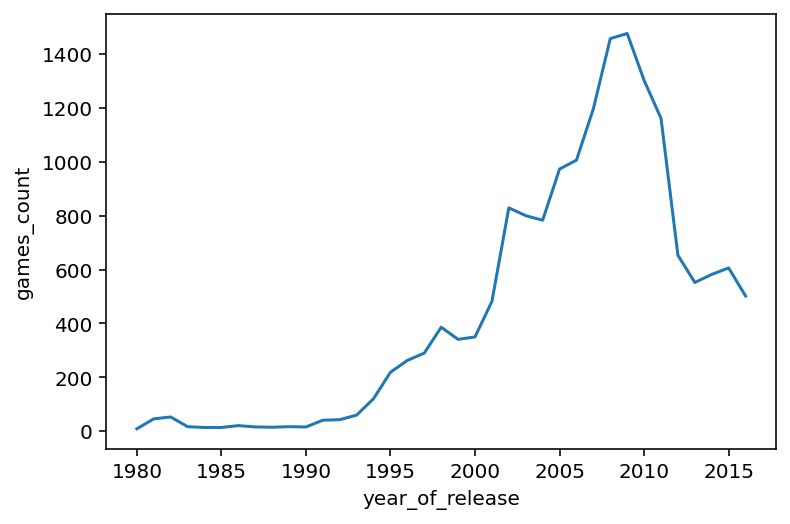

,year_of_release,games_count
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [27]:
year_games = data.pivot_table(index=[data.year_of_release], values=['name'], aggfunc=['count'])
year_games.columns = ['games_count']
year_games.reset_index(inplace=True)
sns.lineplot(x='year_of_release', y='games_count', data=year_games)
plt.show()
display(year_games)

Отобрав количество игр по годам можно увидеть, что пик выпуска новых игр пришелся на 2005-2011 года. Начиная с 2012 года произошел спад разработки новых игр и из года в год выпускается примерно равное количество игр 500-600.

Рассмотрим как менялись продажи разных платформ по годам.

In [28]:
year_platform = data.pivot_table(index=[data.platform], columns=data.year_of_release, 
                                 values=['name'], aggfunc=['count'])

def highlight_max(cell):
    if type(cell) != str and cell > 0 :
        return "color: red"
    else:
        return "color: black"
  
display(year_platform.style.applymap(highlight_max))

Исследование данных показывает, что с 2012 по 2016 годы выпускается сравнительно одинаковое количество компьютерных игр. Однако можно заметить, что с 2014 года не выпускаются, например, новые игры для платформы Nintendo DS. 
Поэтому можно прийти к выводу, что актуальным периодом для анализа является период с 2014. В связи с тем, что компания "Стримчик" является международной, то срок подготовки годовой финансовой отчетности скорее всего установлен до 1 февраля 2017 года. Так как, на декабрь 2016 года годовая финансовая отчетность не могла быть сформированна, то соответственно данные за 2016 года также не могут считаться актуальными и значит актуальным периодом исследования является период с 2014 по 2015 годы.

In [29]:
games_14_15 = data[(data['year_of_release'] > 2013) & (data['year_of_release'] < 2016)]
display(games_14_15)
display(games_14_15.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,76.0,6.90,T,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,74.0,7.80,M,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,76.0,6.90,M,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16667,Hanasaku Manimani,PSV,2014,Adventure,0.00,0.00,0.01,0.00,72.0,7.60,E,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,63.0,6.65,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,71.0,7.20,E10+,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.60,M,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188 entries, 31 to 16707
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1188 non-null   object 
 1   platform         1188 non-null   object 
 2   year_of_release  1188 non-null   int32  
 3   genre            1188 non-null   object 
 4   na_sales         1188 non-null   float64
 5   eu_sales         1188 non-null   float64
 6   jp_sales         1188 non-null   float64
 7   other_sales      1188 non-null   float64
 8   critic_score     1188 non-null   float64
 9   user_score       1188 non-null   float64
 10  rating           1188 non-null   object 
 11  total_sales      1188 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 116.0+ KB


None

Можно заметить, что таблица, содержащая информацию о продажах компьютерных игр в актуальный период, не имеет пропусков - значит предобработка данных былы выполнена корректно.

### <a id='identify-the-best-game-platforms'><span style="color:black">Определение лучших игровых платформ</span></a>

Рассмотрим как продавались компьютерные игры по платформам в актуальный период.

In [30]:
platform_sales = games_14_15.pivot_table(index=['platform'], 
                                         columns=['year_of_release'], 
                                         values=['total_sales'], aggfunc=['sum'])
display(platform_sales)

sum        
                total_sales        
year_of_release        2014    2015
platform                           
3DS                   43.76   27.78
PC                    13.28    8.52
PS3                   47.76   16.82
PS4                  100.00  118.90
PSP                    0.24    0.12
PSV                   12.16    6.25
Wii                    3.75    1.14
WiiU                  22.03   16.35
X360                  34.74   11.96
XOne                  54.07   60.14

Можно заметить, что прибыль растет лишь по двум платформам: PS4, XOne. По остальным платформам продажи за 2015 год упали в половину по сравнению с 2014 годом.

Средние продажи по платформе PS4:           1.03
Средние продажи по платформе 3DS:           0.43
Средние продажи по платформе XOne:           0.81
Средние продажи по платформе WiiU:           0.65
Средние продажи по платформе PS3:           0.36
Средние продажи по платформе X360:           0.48
Средние продажи по платформе PC:           0.22
Средние продажи по платформе Wii:           0.49
Средние продажи по платформе PSV:           0.09
Средние продажи по платформе PSP:           0.03


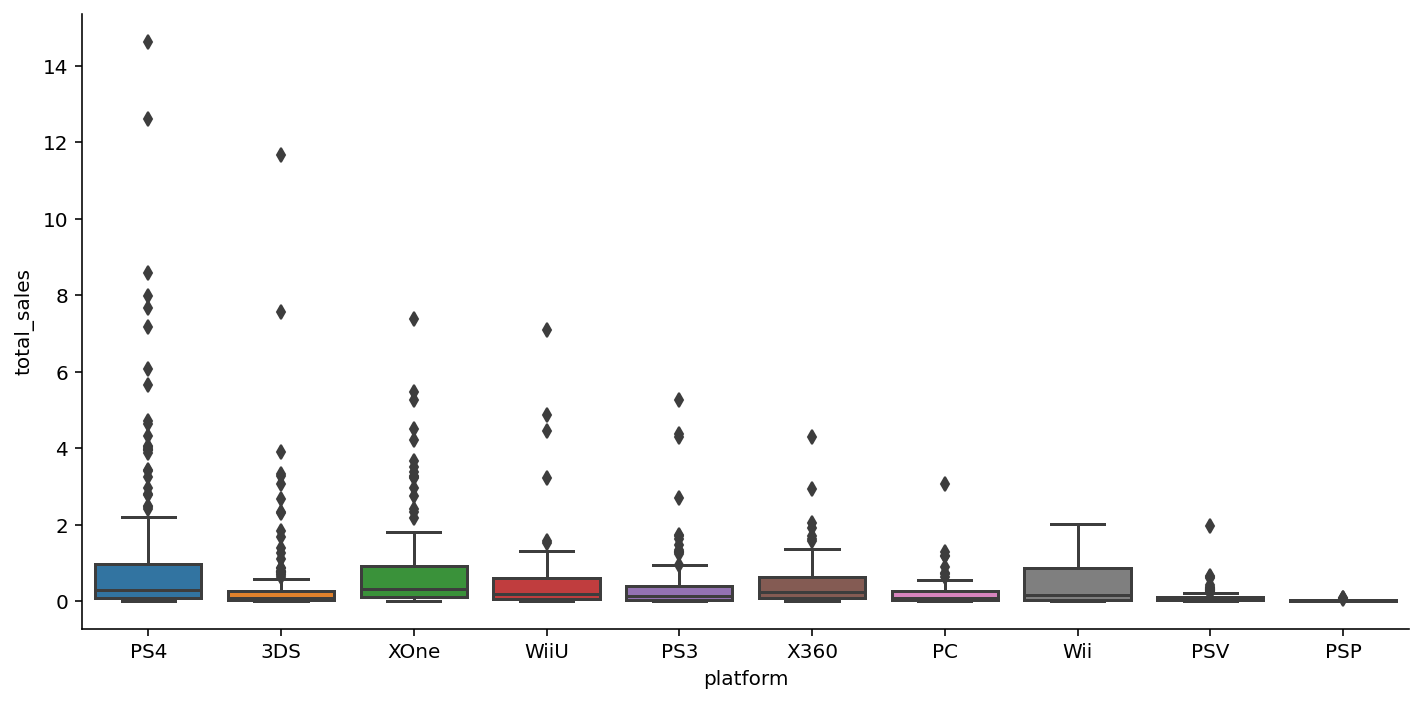

In [31]:
sns.catplot(x='platform', y='total_sales', kind='box', data=games_14_15, height=5, aspect=2)
platforms = games_14_15.platform.unique()

for platform in platforms:
    print(f"Средние продажи по платформе {platform}: \
          {round(games_14_15[games_14_15['platform'] == platform]['total_sales'].mean(), 2)}")

График распределения продаж показывает, что значительный разброс продаж по платформа PS4, 3DS, XOne. При этом, если рассматривать 3 квартиль, то можно выделить плтаформы PS4, XOne, Wii. По средним продажам выделяются PS4, XOne.

In [32]:
XOne_14_15 = games_14_15[games_14_15['platform'] == 'XOne']
PS4_14_15 = games_14_15[games_14_15['platform'] == 'PS4']
other_games = games_14_15[(games_14_15['platform'] != 'XOne') & (games_14_15['platform'] != 'PS4')]

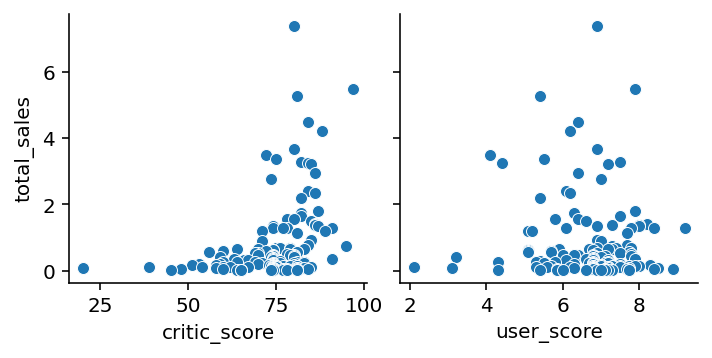

_______________________________________________
Значение коэффициента корреляции Пирсона:
между total_sales и critic_score составил 0.37, что соответствует умереной связи.
между total_sales и user_score составил -0.07, что соответствует отрицательной слабой связи.


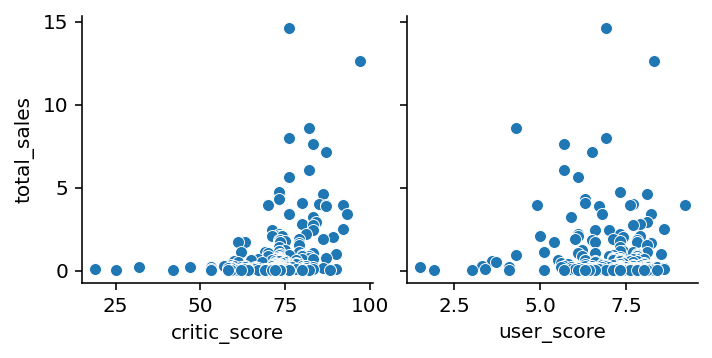

_______________________________________________
Значение коэффициента корреляции Пирсона:
между total_sales и critic_score составил 0.35, что соответствует умереной связи.
между total_sales и user_score составил -0.05, что соответствует отрицательной слабой связи.


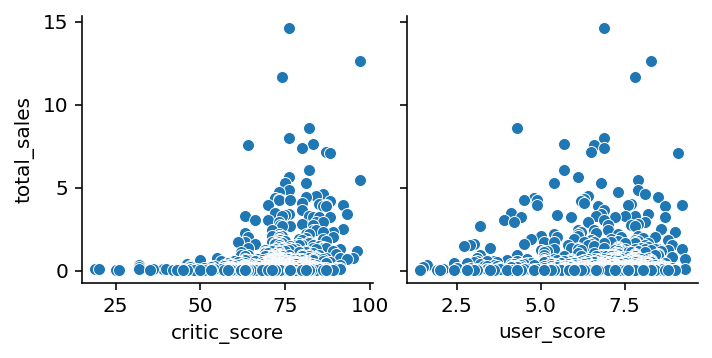

_______________________________________________
Значение коэффициента корреляции Пирсона:
между total_sales и critic_score составил 0.14, что соответствует слабой связи.
между total_sales и user_score составил -0.05, что соответствует отрицательной слабой связи.


In [33]:
def set_correlation_coefficient(df, col):
    coefficient = round(df['total_sales'].corr(df[col]), 2)
    if (coefficient) < 0:
        cor = 'отрицательной '
    else: cor = ''
    if coefficient == 0:
        correlation = f'связь между sum_sales и {col} отсутствует'
    else:
        if abs(coefficient) < 0.3:
            cor += 'слабой'
        elif abs(coefficient) < 0.5:
            cor += 'умереной'
        elif abs(coefficient) < 0.7:
            cor += 'заметной'
        elif abs(coefficient) < 0.9:
            cor += 'высокой'
        elif abs(coefficient) < 1:
            cor += 'весьма высокой'
        elif abs(coefficient) == 1:
            cor += 'абсолютной'
        correlation = f'между total_sales и {col} составил {coefficient}, что соответствует {cor} связи.'

    print(correlation)

    
new_features = ['critic_score', 'user_score']
sns.pairplot(XOne_14_15, x_vars=new_features, y_vars=['total_sales']) 
plt.show()
print('_______________________________________________')
print('Значение коэффициента корреляции Пирсона:')

for feature in new_features:
    set_correlation_coefficient(XOne_14_15, feature)

sns.pairplot(PS4_14_15, x_vars=new_features, y_vars=['total_sales']) 
plt.show()
print('_______________________________________________')
print('Значение коэффициента корреляции Пирсона:')

for feature in new_features:
    set_correlation_coefficient(PS4_14_15, feature)  
    
sns.pairplot(games_14_15, x_vars=new_features, y_vars=['total_sales']) 
plt.show()
print('_______________________________________________')
print('Значение коэффициента корреляции Пирсона:')

for feature in new_features:
    set_correlation_coefficient(other_games, feature)

Диаграммы рассеивания показывают на отсутствие прямой взаимосвязи между оценками критиков, пользователей и продажами. При этом расчет коэффициента корреляция Пирсона показывает на умереную связь между оценками критиков и продажами игр на наиболее популярных платформах.

### <a id='define-the-most-popular-genres'><span style="color:black">Определение самых популярных жанров компьютерных игр</span></a>

Рассмотрим какие компьютерные игры чаще всего выпускаются разработчиками.

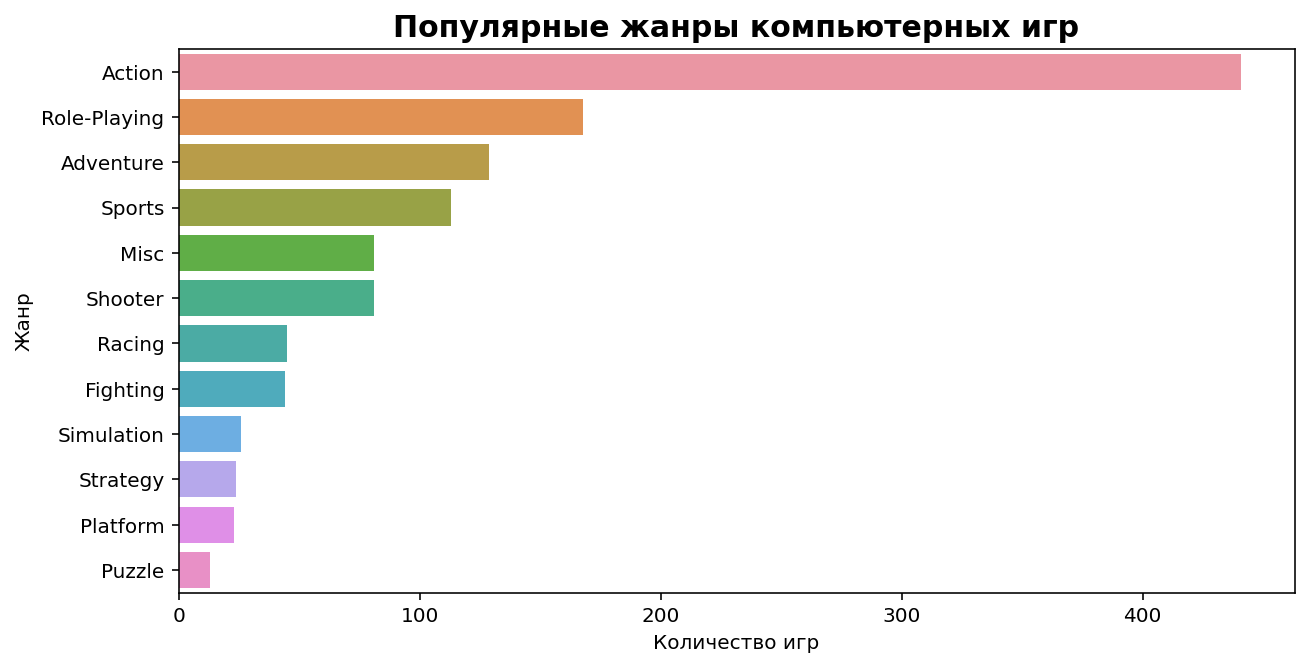

,genre,games_count
0,Action,441
7,Role-Playing,168
1,Adventure,129
10,Sports,113
3,Misc,81
8,Shooter,81
6,Racing,45
2,Fighting,44
9,Simulation,26
11,Strategy,24


In [34]:
games_genre = games_14_15.pivot_table(index=['genre'], 
                                      values=['name'], aggfunc=['count'])
games_genre.columns = ['games_count']
games_genre.reset_index(inplace=True)

#определяем стиль графика
plt.style.use('tableau-colorblind10')
plt.figure(figsize = (10,5))
sns.barplot(data=games_genre.sort_values('games_count', ascending=False), 
            x='games_count', y='genre')

plt.title('Популярные жанры компьютерных игр', fontdict={'fontsize': 15, 'fontweight':'bold'})
plt.xlabel('Количество игр')
plt.ylabel('Жанр')
plt.show()
display(games_genre.sort_values('games_count', ascending=False))

Можно заметить, что наиболее популярными играми у разработчиков являются игры жанров "Action", "Role-Playing", "Adventure" и "Sports".

Рассмотрим как продаются игры различных жанров.

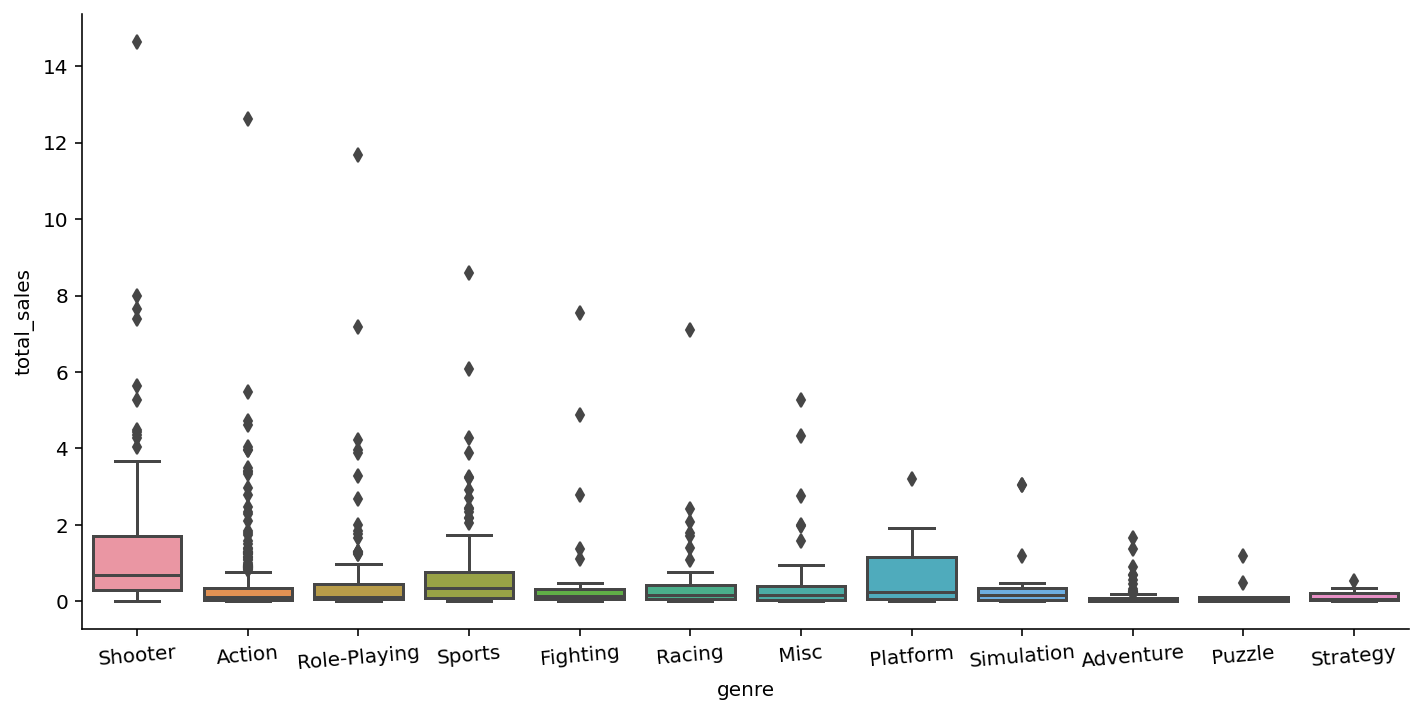

Средние продажи игра жанра Shooter: 1.64
Средние продажи игра жанра Action: 0.38
Средние продажи игра жанра Role-Playing: 0.5
Средние продажи игра жанра Sports: 0.76
Средние продажи игра жанра Fighting: 0.54
Средние продажи игра жанра Racing: 0.55
Средние продажи игра жанра Misc: 0.43
Средние продажи игра жанра Platform: 0.65
Средние продажи игра жанра Simulation: 0.43
Средние продажи игра жанра Adventure: 0.11
Средние продажи игра жанра Puzzle: 0.17
Средние продажи игра жанра Strategy: 0.12


In [35]:
sns.catplot(x='genre', y='total_sales', kind='box', data=games_14_15, height=5, aspect=2)
plt.xticks(rotation=5)
plt.show()
genres = games_14_15.genre.unique()

for genre in genres:
    print(f"Средние продажи игра жанра {genre}: {round(games_14_15[games_14_15['genre'] == genre]['total_sales'].mean(), 2)}")

График показывает, что наиболее популярными жанрами игр у потребителей являются: Shooter, Sports, Platform. Наименьшую прибыль приносят игры жанров: Puzzle и Adventure. 

### <a id='define-top5-platform-sales'><span style="color:black">Определение топ-5 популярных платформ в отдельном регионе</span></a>

Определим самые популярные платформы в разных регионах.

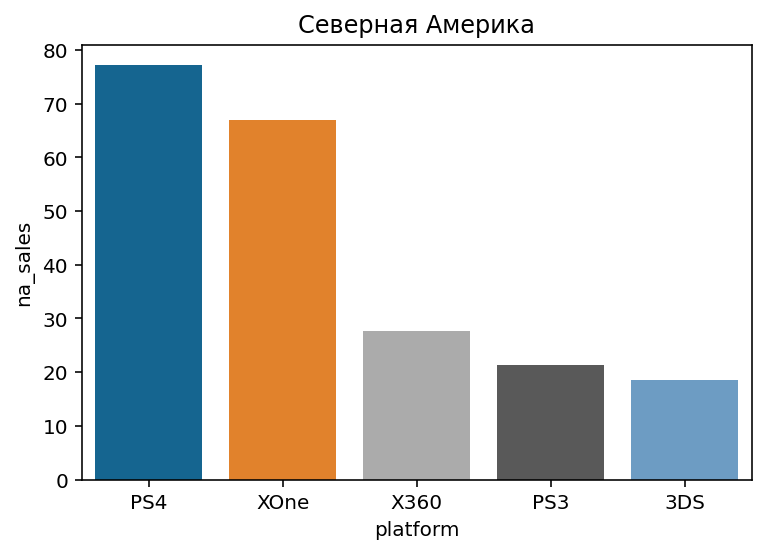

,platform,na_sales
3,PS4,77.12
9,XOne,67.00
8,X360,27.61
2,PS3,21.38
0,3DS,18.50


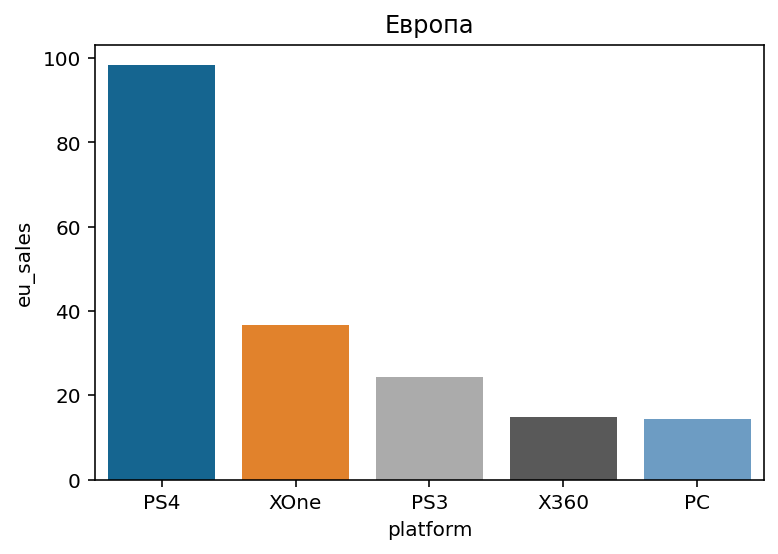

,platform,eu_sales
3,PS4,98.26
9,XOne,36.62
2,PS3,24.28
8,X360,14.78
1,PC,14.44


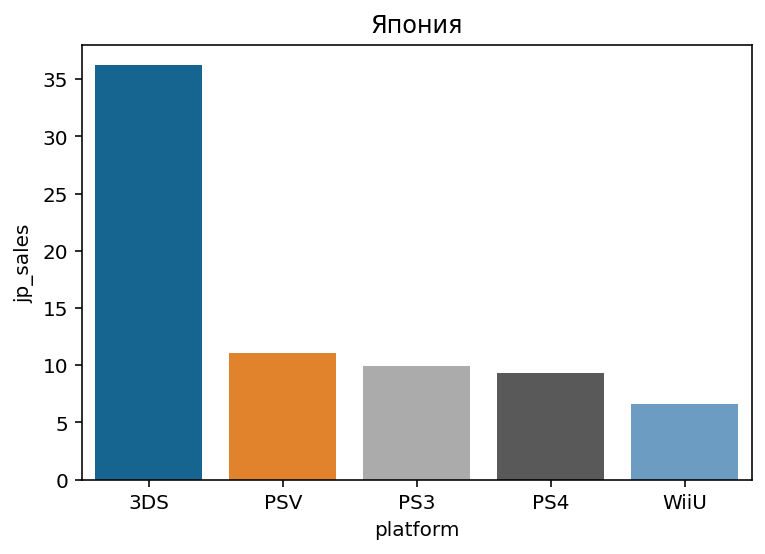

,platform,jp_sales
0,3DS,36.21
5,PSV,11.05
2,PS3,9.92
3,PS4,9.28
7,WiiU,6.64


In [36]:
# создаем функцию для построения графиков и вывода сводной информации
def define_top5(aspect, region, region_name):
    
    top5_games = (
        games_14_15.groupby([aspect], as_index=False)
        .agg({region: 'sum'})
        .sort_values(region, ascending=False)
        .head(5)
    )
    sns.barplot(data=top5_games, 
            x=aspect, y=region)
    plt.title(region_name)
    plt.show()
    display(top5_games)
    
regions = {'na_sales': 'Cеверная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
for key, values in regions.items():        
    define_top5('platform', key, values)

Данные показывают, что наиболее популярными платформами в Северной Америке являются PS4, XOne (примерно одинаково популярны), в Европе - наиболее популярной является PS4 (почти в 2 раза больше продаж), в Японии - XOne (более чем в 3,5 раза больше продаж).

### <a id='define-top5-genre-sales'><span style="color:black">Определение топ-5 популярных жанров в отдельном регионе</span></a>

Определим самые популярные жанры в разных регионах.

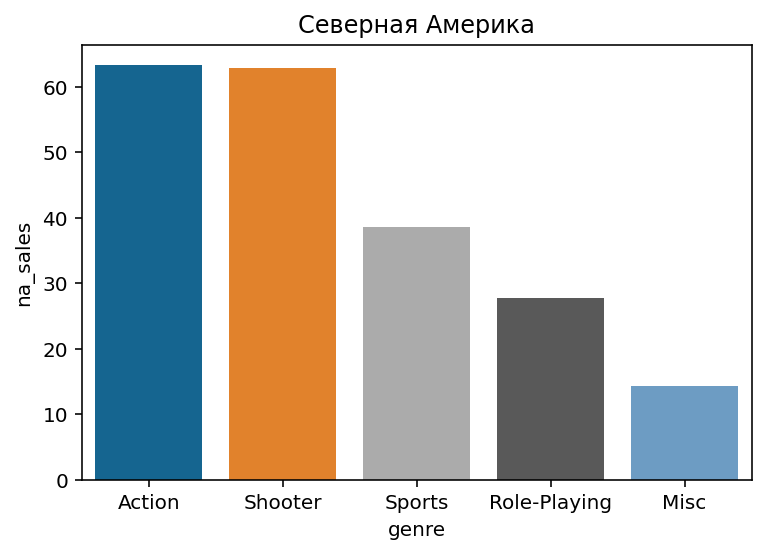

,genre,na_sales
0,Action,63.24
8,Shooter,62.78
10,Sports,38.59
7,Role-Playing,27.69
3,Misc,14.29


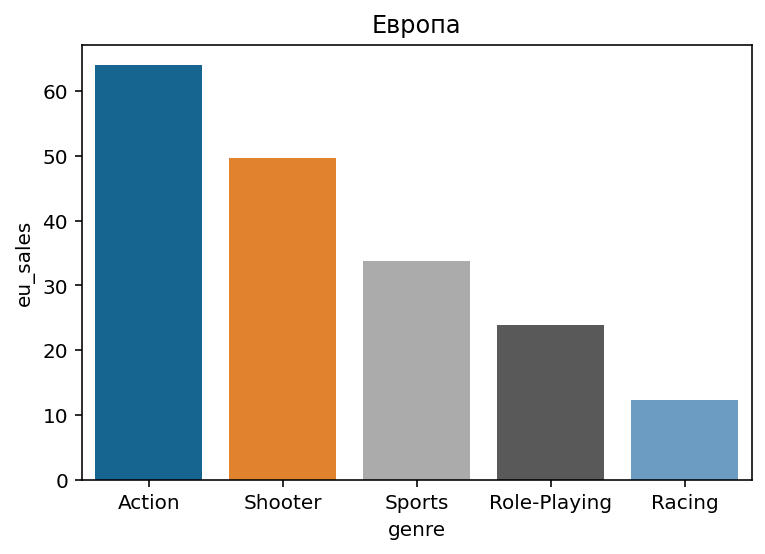

,genre,eu_sales
0,Action,64.00
8,Shooter,49.62
10,Sports,33.72
7,Role-Playing,23.94
6,Racing,12.36


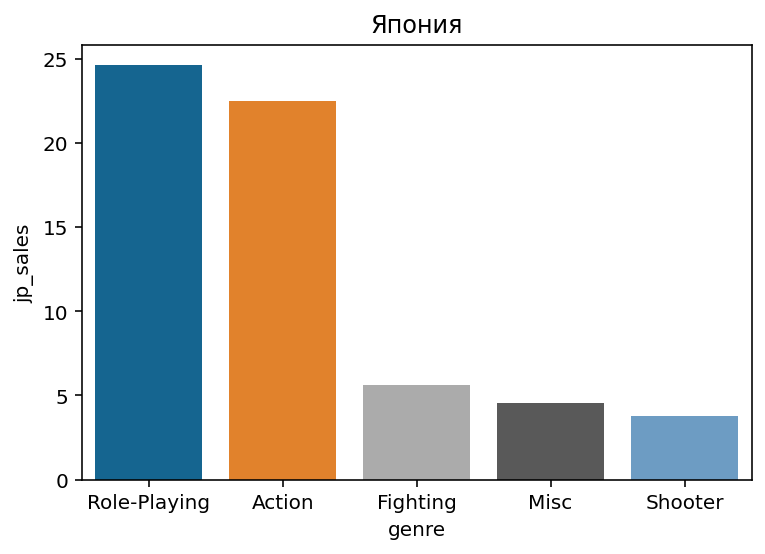

,genre,jp_sales
7,Role-Playing,24.62
0,Action,22.51
2,Fighting,5.62
3,Misc,4.57
8,Shooter,3.81


In [37]:
for key, values in regions.items():        
    define_top5('genre', key, values)

Данные показывают, что наиболее популярными жанрами в Северной Америке являются Action и  Shooter (примерно одинаково популярны), в Европе - наиболее популярным является Action (несколько менее популярен Shooter), в Японии свои предпочтения - Role-Playing и Action (Shooter лишь замыкает топ 5). Обращает на себя также внимание популярность жанра Sports в Северной Америке и Европе.

### <a id='define-ESRB-rating-affects-sales'><span style="color:black">Определение влияния рейтинга ESRB на продажи в отдельном регионе</span></a>

Определим влияет ли рейтинг на продажи в разных регионах.

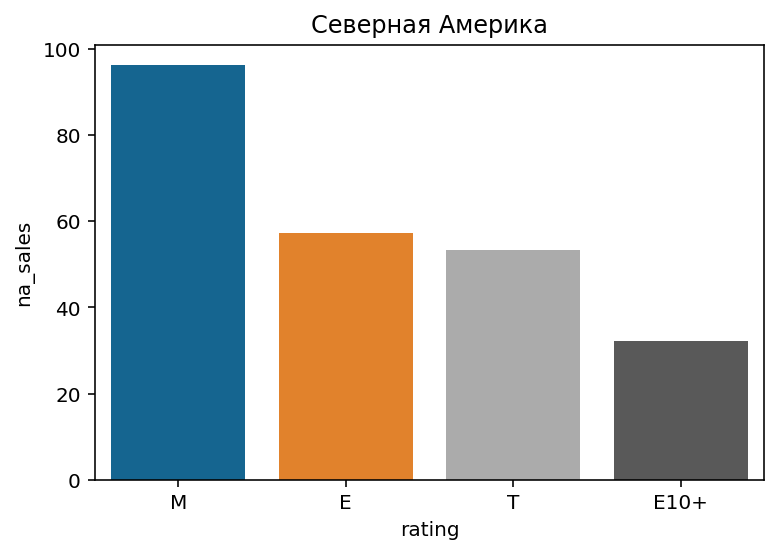

,rating,na_sales
2,M,96.21
0,E,57.37
3,T,53.38
1,E10+,32.28


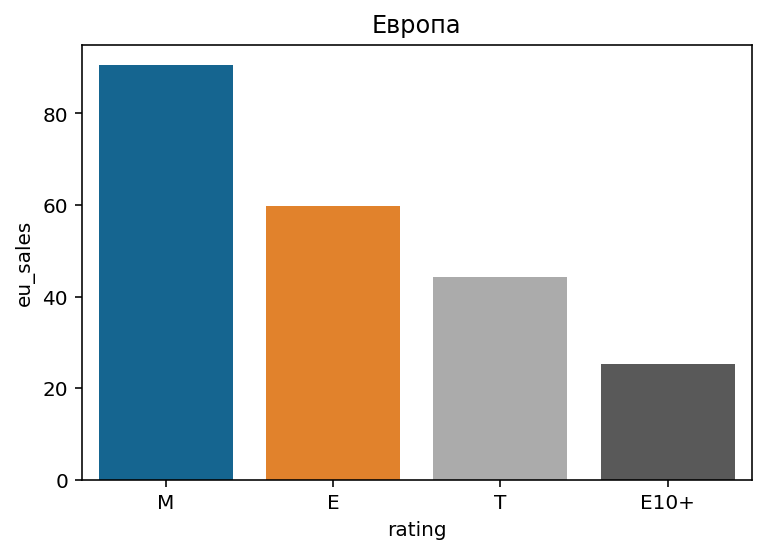

,rating,eu_sales
2,M,90.49
0,E,59.69
3,T,44.17
1,E10+,25.16


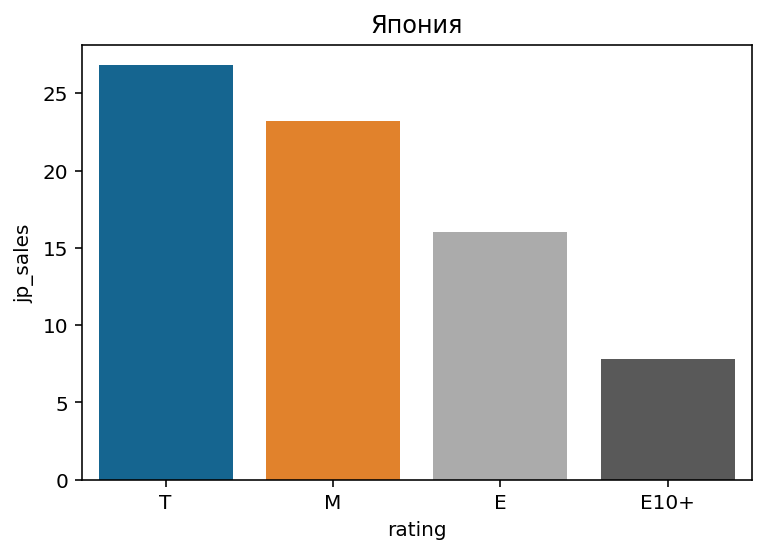

,rating,jp_sales
3,T,26.80
2,M,23.19
0,E,16.05
1,E10+,7.81


In [38]:
for key, values in regions.items():        
    define_top5('rating', key, values)

Данные показывают, что в Северной Америке и Европе пользователи предпочитают игры категории 'M' (т.е. для взрослых), а в Японии - 'T' (т.е. подростки). Скорее всего это связано с жанрами, которые наиболее популярны в указанных регионнах (Северной Америке и Европы популярны 'стрелялки', которые чаще всего имеют рейтинг 'M'.

**Вывод**: Анализ данных в актуальный период позваляет сделать следующие умозаключения.

При планировании продаж на 2017 год актуальным периодом анализа является информация о продажах в 2014-2015 годах.
- Наиболее популярными платформами являются PS4, XOne. Продажи по этим платформам растут. При чем наиболее популярными платформами в Северной Америке являются PS4, XOne (примерно одинаково популярны), в Европе - наиболее популярной является PS4 (почти в 2 раза больше продаж), в Японии - XOne (более чем в 3,5 раза больше продаж).
- Наиболее популярными играми у разработчиков являются игры жанров "Action", "Role-Playing", "Adventure" и "Sports", однако наиболее популярными жанрами игр у потребителей являются: Shooter, Sports, Platform. Наименьшую прибыль приносят игры жанров: Puzzle и Adventure. 
- Наиболее популярными жанрами в Северной Америке являются Action и  Shooter (примерно одинаково популярны), в Европе - наиболее популярным является Action (несколько менее популярен Shooter), в Японии свои предпочтения - Role-Playing и Action (Shooter лишь замыкает топ 5). Обращает на себя также внимание популярность жанра Sports в Северной Америке и Европе. 
- В Северной Америке и Европе пользователи предпочитают игры категории 'M' (т.е. для взрослых), а в Японии - 'T' (т.е. подростки). Скорее всего это связано с жанрами, которые наиболее популярны в указанных регионнах (Северной Америке и Европы популярны 'стрелялки', которые чаще всего имеют рейтинг 'M'.

## <a id='hypothesis-testing'><span style="color:black">5. Проверка гипотез</span></a>

### <a id='revenue-difference-Xbox-PC'><span style="color:black">Проверка гипотезы о различии пользовательских рейтингов платформ Xbox One и PC одинаковые</span></a>

Нулевая гипотеза - пользовательский рейтинг Xbox One и PC не различается.

Альтернативная гипотеза - пользовательский рейтинг Xbox One и PC различается.

Для проверки гипотезы применим двухвыборочный критерий Стьюдента, основанный на предположении, что выборки получены из генеральных совокупностей, имеющих приближенно нормальное распраделение и не взаимосвязанных друг с другом. Для реализации используем метод scipy.stats.ttest_ind библиотеки scipy. 

In [39]:
XOne = games_14_15[games_14_15['platform'] == 'XOne']
PC = games_14_15[games_14_15['platform'] == 'PC']

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(XOne['user_score'], PC['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.42624429772850003
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя пользовательских рейтингов платформ Xbox One и PC неодинаковы, с вероятностью в почти 43% такое различие можно получить случайно. Нет оснований отвергнуть нулевую гипотезу в пользу альтернативной.

### <a id='revenue-difference-genre_Action-n-Sport'><span style="color:black">Проверка гипотезы о различии средних пользовательских рейтингов жанров Action и Sports</span></a>

Нулевая гипотеза - пользовательский рейтинг жанров Action и Sports не различается.

Альтернативная гипотеза - пользовательский рейтинг жанров Action и Sports различается.

In [40]:
Action = games_14_15[games_14_15['genre'] == 'Action']
Sports = games_14_15[games_14_15['genre'] == 'Sports']
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(Action['user_score'], Sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.290199940927712e-32
Отвергаем нулевую гипотезу


Исходя из полученных результатов есть основания отвергнуть нулевую гипотезу в пользу альтернативной.

## <a id='conclusions'><span style="color:black">6. Выводы</span></a>

При планировании продаж в 2017 году необходимо иметь ввиду следующие данные.
- Наиболее популярными платформами являются PS4, XOne. Продажи по этим платформам растут. При чем наиболее популярными платформами в Северной Америке являются PS4, XOne (примерно одинаково популярны), в Европе - наиболее популярной является PS4 (почти в 2 раза больше продаж), в Японии - XOne (более чем в 3,5 раза больше продаж).
- Наиболее популярными играми у разработчиков являются игры жанров "Action", "Role-Playing", "Adventure" и "Sports", однако наиболее популярными жанрами игр у потребителей являются: Shooter, Sports, Platform. Наименьшую прибыль приносят игры жанров: Puzzle и Adventure. 
- Наиболее популярными жанрами в Северной Америке являются Action и  Shooter (примерно одинаково популярны), в Европе - наиболее популярным является Action (несколько менее популярен Shooter), в Японии свои предпочтения - Role-Playing и Action (Shooter лишь замыкает топ 5). Обращает на себя также внимание популярность жанра Sports в Северной Америке и Европе. 
- В Северной Америке и Европе пользователи предпочитают игры категории 'M' (т.е. для взрослых), а в Японии - 'T' (т.е. подростки). Скорее всего это связано с жанрами, которые наиболее популярны в указанных регионнах (Северной Америке и Европы популярны 'стрелялки', которые чаще всего имеют рейтинг 'M'.

Проверка гипотез показывает, что на различие в пользовательских рейтингах среди игр жанров Action и Sports, при этом анализ корреляции показывает на отсутствие зависимости продаж от пользовательского рейтинга в разрезе платформ и на наличие умеренной связи между продажами и оценками критиков по наиболее популярным платформам.